In [1]:
import pandas as pd  # For dataframes
import matplotlib.pyplot as plt  # For graphs
import os


path = os.path.abspath("spendings.xls")

In [2]:
def check_error(sheet):
    """Check if the chosen sheet can be opened or not."""

    try:
        month_sheet = pd.read_excel(path, sheet_name=sheet)
    except ValueError:
        print(f"Unable to find the sheet with the name '{sheet}'\n")
        return (False,)
    else:
        date_sheet = month_year(sheet)
        return (True, month_sheet, date_sheet)


In [3]:
def month_year(sheet):
    """Function returning the requested month and related year."""

    months = ['January', 'February', 'March', 'April', 'May',
             'June', 'July', 'August', 'September', 'October',
             'November', 'December']
    x = sheet.split('_')

    for month in months:
        if x[0] in month.lower():
            return (month, x[1])


In [4]:
def spendings(sheet):
    """Retrieve the datasheet of the chosen month and display its analytics."""
    
    res = check_error(sheet)
    if res[0] == True:
        date = res[2]
        print_analytics(res[1], date)
    else:
        return


In [5]:
def view_month_datasheet(sheet):
    """Print the complete spendings datasheet of the chosen month."""

    res = check_error(sheet)
    if res[0] == True:
        date = res[2]
        print("\n")
        print(f"\t\t\n{date[0]} {date[1]} Complete Spendings Datasheet")
        print("-------------------------------------------------------")
        print(res[1])
        print("-------------------------------------------------------\n") 

    else:
        return


In [6]:
def print_analytics(spendings, month_year):
    """Function calling other functions to display the analytics."""
    
    print("\n")
    print("********************************************\n")
    print(f"\tAnalytics for {month_year[0]} {month_year[1]}\n")
    print("********************************************\n")
    total_spent(spendings, month_year[0])  # To print total money spent.
    graph_categories(spendings, month_year)


In [7]:
def total_spent(spendings, month):
    """This function will print the total spent in the current month."""

    total = spendings['Amount'].sum()
    print(f"Total spent in {month}: £{round(total, 2)}\n")


In [8]:
def top_spendings(category):
    """Print categories table standings from highest to lowest spending."""
    
    sorted_vals = sorted(category.values(), reverse=True) # Sort the values.
    sorted_dict = {}
    
    for i in sorted_vals:
        for k in category.keys():
            if category[k] == i:
                sorted_dict[k] = category[k]
                break
    
    place = 1
    print("Spendings from highest to lowest")
    print("-----------------------------------")

    for key, val in sorted_dict.items():
        if key.lower() == "transportation":
            key = "Trans."
        elif key.lower() == 'bills/taxes':
            key = 'b./tax'
        elif key.lower() == 'subscription':
            key = 'Subscr.'
        
        if place >= 10:
            print(f"{place}.| {key}\t\t| £{val}")
        else:
            print(f"{place}. | {key}\t\t| £{val}")

        print("-----------------------------------")
        place += 1


In [9]:
def categories_total(spendings):
    """Returns a dictionary with the total money spent for each category."""
    
    category_headers = [
        "Rent",
        "Bills/Taxes",
        "Transportation",
        "Grocery",
        "Shopping",
        "Subscription",
        "Food",
        "Drinks",
        "Leisure",
        "Vacation",
        "Other"
    ]
    
    category_spendings = {}
    
    for category in category_headers:
        category_spendings[category] = round(spendings[spendings["Category"] == category]["Amount"].sum(), 2)
        
    keys = category_spendings.keys()
    values = category_spendings.values()
    
    # Function to print categories table standings based on spendings.
    top_spendings(category_spendings)
    
    return (keys, values)


In [10]:
def graph_categories(spendings, date):
    """Bar chart of money spent per category."""
    
    key_val = categories_total(spendings)
    
    plt.bar(key_val[0], key_val[1], color=['#919191', '#90BE6D', '#52796f', '#F9C74F', '#4D908E', '#F9844A', '#277DA1', '#7678ed'])
    plt.title(f"{date[0]} {date[1]} Spendings", fontsize=18)
    plt.xlabel("Categories", fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel("Total spent (£)", fontsize=14)

    for index, value in enumerate(key_val[1]):
        plt.text(index, value, f"£{str(value)}", ha='center', va='center', fontsize=12)
    
    plt.show()  # To show the graph plotted here and not at the end of the program.


In [11]:
def all_months_progression():
    """Function to plot graph of past months progression
       spendings."""
    
    xls_file = pd.ExcelFile(path)
    sheets = xls_file.sheet_names
    count_sheets = range(0, len(sheets))

    months_total = []
    
    for i in count_sheets:
        # Read each sheet into a dataframe one at a time.
        month = pd.read_excel(path, sheet_name=sheets[i])
        total_spent = month['Amount'].sum()
        months_total.append(round(total_spent, 2))
    
    plt.plot(range(len(sheets)), months_total)
    plt.title("Monthly Spendings", fontsize=18)
    plt.xlabel("Months", fontsize=14)
    plt.xticks(range(len(sheets)), sheets, rotation=45)
    plt.ylabel("Total Spent", fontsize=14)
    
    # To display the total amount spent on each point.
    for x, s in enumerate(months_total):
        plt.text(x, s+30, "£%d" %s, ha="center")
    
    plt.show()


In [12]:
def category_progression(category):
    xls_file = pd.ExcelFile(path)
    sheets = xls_file.sheet_names
    count_sheets = range(0, len(sheets))

    months_total = []
    
    for i in count_sheets:
        # Read each sheet into a dataframe one at a time.
        month = pd.read_excel(path, sheet_name=sheets[i])
        months_total.append(month[month["Category"] == category]["Amount"].sum())
    
    plt.plot(range(len(sheets)), months_total)
    plt.title(f"{category}'s Monthly Spendings", fontsize=18)
    plt.xlabel("Months", fontsize=14)
    plt.xticks(range(len(sheets)), sheets, rotation=45)
    plt.ylabel(f"{category}'s Total Spend", fontsize=14)
    
    # To display the total amount spent on each point.
    for x, s in enumerate(months_total):
        plt.text(x, s+30, "£%d" %s, ha="center")
    
    plt.show()

In [13]:
def check_category_exists():
    
    spendings_categories = [
        "bills/taxes",
        "transportation",
        "grocery",
        "other",
        "food",
        "shopping",
        "leisure",
        "drinks",
        "subscription",
        "rent",
        "vacation",
    ]
    
    while True:
        print("""
            Which category's progression spending do you want to print?
            - Bills/Taxes
            - Transportation
            - Grocery
            - Other
            - Food
            - Shopping
            - Leisure
            - Drinks
            - Subscription
            - Rent
            - Vacation
        """)

        category = input()
        
        if category.lower() in spendings_categories:
            return category
        else:
            print("\nPLEASE CHOOSE FROM ONE OF THE AVAILABLE CATEGORIES\n")
    


        

        		MAIN MENU
        1) View a month's spendings analytics.
        2) Print a month's spendings datasheet.
        3) View the progression spending of past months.
        4) View a category's monthly progression spending.
        5) Exit program.
    

Choose an option 1 to 5: 3



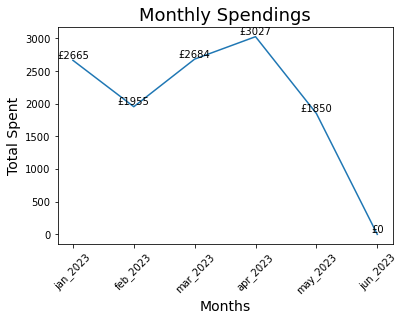


        

        		MAIN MENU
        1) View a month's spendings analytics.
        2) Print a month's spendings datasheet.
        3) View the progression spending of past months.
        4) View a category's monthly progression spending.
        5) Exit program.
    

Choose an option 1 to 5: 1
Which month's analytics do you want to view?
(i.e. 'jan_2023'): may_2023


********************************************

	Analytics for May 2023

********************************************

Total spent in May: £1850.8

Spendings from highest to lowest
-----------------------------------
1. | Rent		| £950.0
-----------------------------------
2. | Food		| £212.55
-----------------------------------
3. | Vacation		| £204.7
-----------------------------------
4. | Grocery		| £136.19
-----------------------------------
5. | Leisure		| £91.98
-----------------------------------
6. | b./tax		| £68.94
-----------------------------------
7. | Shopping		| £65.66
-----------------------------------


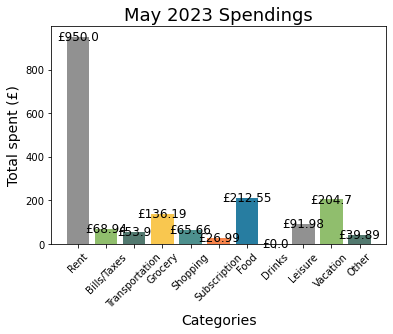


        

        		MAIN MENU
        1) View a month's spendings analytics.
        2) Print a month's spendings datasheet.
        3) View the progression spending of past months.
        4) View a category's monthly progression spending.
        5) Exit program.
    


In [ ]:
while True:
    
    print("""
        \n
        \t\tMAIN MENU
        1) View a month's spendings analytics.
        2) Print a month's spendings datasheet.
        3) View the progression spending of past months.
        4) View a category's monthly progression spending.
        5) Exit program.
    """)
    
    choice = input("\nChoose an option 1 to 5: ")
    
    if choice == '1':
        print("Which month's analytics do you want to view?")
        month_chosen = input("(i.e. 'jan_2023'): ")
        spendings(month_chosen)

    elif choice == '2':
        print("Which month's spendings datasheet do you want to get?")
        month_chosen = input("(i.e. 'jan_2023'): ")
        view_month_datasheet(month_chosen)
        
    elif choice == '3':
        print()
        all_months_progression()
        
    elif choice == '4':
        category = check_category_exists()
        category_progression(category)

    elif choice == '5':
        print("\nGoodbye and see you next time Luca :)")
        break
    
    else:
        print("Please select a valid entry between 1 and 3.")
